In [3]:
import habitat
import matplotlib.pyplot as plt
%matplotlib inline

/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/numba-0.46.0-py3.6-linux-x86_64.egg/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [4]:
config = habitat.get_config("/home/green-tea/all_projects/habitat/segmentation/configs/challenge_objectnav2020.local.rgbd.yaml")
# config = habitat.get_config()

In [5]:
config.defrost()

config.DATASET.DATA_PATH = "/home/green-tea/all_stash/matterport3D/data/val_mini.json.gz"
config.DATASET.SCENES_DIR = "/home/green-tea/all_stash/matterport3D/data4/v1/tasks"

config.SIMULATOR.AGENT_0.SENSORS.append('SEMANTIC_SENSOR')

config.freeze()

In [6]:
env = habitat.Env(config)

2020-04-05 20:02:28,585 Initializing dataset ObjectNav-v1
2020-04-05 20:02:28,688 initializing sim Sim-v0
I0405 20:02:34.201514 3133 simulator.py:143] Loaded navmesh /home/green-tea/all_stash/matterport3D/data4/v1/tasks/mp3d/x8F5xyUWy9e/x8F5xyUWy9e.navmesh
I0405 20:02:34.202250 3133 simulator.py:155] Recomputing navmesh for agent's height 0.88 and radius 0.18.
2020-04-05 20:02:34,295 Initializing task ObjectNav-v1


In [7]:
observations = env.reset()

In [8]:
print(observations.keys())

dict_keys(['rgb', 'depth', 'semantic', 'objectgoal', 'compass', 'gps'])


[[176 176 176 ...  22  22  22]
 [176 176 176 ...  22  22  22]
 [176 176 176 ...  22  22  22]
 ...
 [196 196 196 ...  23  23  23]
 [196 196 196 ...  23  23  23]
 [196 196 196 ...  23  23  23]]
(480, 640)


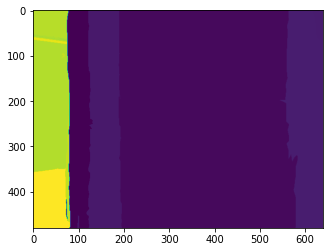

In [9]:
print(observations['semantic'])
print(observations['semantic'].shape)

plt.imshow(observations['semantic'])

In [10]:
print(observations['objectgoal'])

[12]


In [11]:
image = observations['rgb']

In [12]:
image.shape

(480, 640, 3)

In [13]:
image.reshape([3, 480, 640])

array([[[130, 114,  89, ..., 172, 155, 188],
        [172, 155, 184, ..., 150, 191, 167],
        [150, 191, 167, ..., 222, 172, 140],
        ...,
        [182, 166, 129, ..., 148, 124, 181],
        [148, 124, 181, ..., 123, 181, 156],
        [123, 179, 155, ..., 198, 157, 124]],

       [[182, 166, 129, ..., 148, 124, 181],
        [148, 124, 181, ..., 123, 181, 156],
        [123, 179, 155, ..., 197, 156, 123],
        ...,
        [181, 165, 140, ..., 146, 113, 186],
        [145, 112, 186, ..., 123, 189, 156],
        [123, 189, 156, ..., 191, 150, 117]],

       [[181, 165, 140, ..., 146, 113, 186],
        [145, 112, 186, ..., 124, 189, 156],
        [124, 189, 156, ..., 191, 150, 117],
        ...,
        [175, 175, 158, ..., 152, 119, 185],
        [152, 119, 185, ..., 127, 184, 151],
        [127, 183, 151, ..., 177, 144, 111]]], dtype=uint8)

In [14]:
from matplotlib.pyplot import imshow

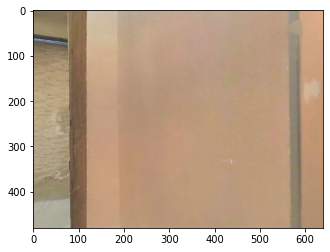

In [15]:
plt.imshow(image)

In [15]:
from __future__ import absolute_import, division, print_function

import argparse
import importlib
import itertools
import matplotlib
matplotlib.use('Agg')
import time
from   multiprocessing import Pool
import numpy as np
import os
import pdb
import pickle
import subprocess
import sys
import tensorflow.contrib.slim as slim
import threading
import scipy.misc
from skimage import color
import init_paths
from models.sample_models import *
from lib.data.synset import *
import skimage
import skimage.io
import transforms3d
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random
import utils
import models.architectures as architectures
from   data.load_ops import resize_rescale_image
from   data.load_ops import rescale_image
import utils
import lib.data.load_ops as load_ops

/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/green-tea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/green-tea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/green-tea/.local/lib/python3

Building for Tensorflow version 1.5.0


In [16]:
import scipy

In [17]:
import os
import tensorflow as tf
from task_viz import *

/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [18]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [19]:
# configs

task = 'segmentsemantic'

image_name = ""

store_name = ""

store_rep=False
store_pred=False
on_screen=False

In [20]:
repo_dir = "/home/green-tea/all_projects/habitat"
CONFIG_DIR = "/home/green-tea/all_projects/habitat/segmentsemantic"

In [21]:
import myutils as utils
import data.load_ops
from   general_utils import RuntimeDeterminedEnviromentVars
import general_utils

In [22]:
cfg = utils.load_config( CONFIG_DIR, nopause=True )
RuntimeDeterminedEnviromentVars.register_dict( cfg )

-------------------------------------------------
config:
	batch_size                    32
	checkpoint_save_every_secs    600
	decoder                       <function decoder_fc_15_layer_256_resolution_fully_convolutional_16x16x4 at 0x7fb670a3f7b8>
	decoder_kwargs                {'activation_fn': <function leaky_relu.<locals>.<lambda> at 0x7fb66eb66598>, 'weight_decay': 2e-06}
	discriminator_learning_args   {'initial_learning_rate': 1e-05, 'optimizer': <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>, 'optimizer_kwargs': {}}
	encoder                       <function resnet_encoder_fully_convolutional_16x16x8 at 0x7fb670a35e18>
	encoder_kwargs                {'resnet_build_fn': <function resnet_v1_50_16x16 at 0x7fb670a35950>, 'weight_decay': 2e-06}
	hidden_size                   1024
	initial_learning_rate         0.0001
	input_dim                     (256, 256)
	input_domain_name             rgb
	input_dtype                   <dtype: 'float32'>
	input_num_

In [360]:
cfg['batch_size'] = 1
if 'batch_size' in cfg['encoder_kwargs']:
    cfg['encoder_kwargs']['batch_size'] = 1
cfg['model_path'] = os.path.join( repo_dir, 'temp', task, 'model.permanent-ckpt' )
cfg['root_dir'] = repo_dir

cfg['input_dim'] = (640, 480)
cfg['target_dim'] = (640, 480)
cfg['input_preprocessing_fn_kwargs']['new_dims'] = (640, 480)
cfg['target_from_filenames_kwargs']['new_dims'] = (640, 480)

In [361]:
# img = load_raw_image_center_crop( "/home/green-tea/all_stash/test.png" )
# print(img.shape, observations['rgb'].shape)
img = observations['rgb']
img = skimage.img_as_float(img)
image = scipy.misc.toimage(np.squeeze(img), cmin=0.0, cmax=1.0)


/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


In [362]:
img = cfg[ 'input_preprocessing_fn' ]( img, **cfg['input_preprocessing_fn_kwargs'] )

In [363]:
img = img[np.newaxis,:]

In [364]:
print("Doing {task}".format(task=task))
general_utils = importlib.reload(general_utils)
tf.reset_default_graph()
training_runners = { 'sess': tf.InteractiveSession(), 'coord': tf.train.Coordinator() }

Doing segmentsemantic


In [365]:
print(cfg)

{'num_epochs': 30, 'model_path': '/home/green-tea/all_projects/habitat/temp/segmentsemantic/model.permanent-ckpt', 'model_type': <class 'models.encoder_decoder_softmax.SoftmaxED'>, 'weight_decay': 2e-06, 'instance_noise_sigma': 0.1, 'instance_noise_anneal_fn': <function inverse_time_decay at 0x7fb6810e20d0>, 'instance_noise_anneal_fn_kwargs': {'decay_rate': 0.2, 'decay_steps': 1000}, 'encoder': <function resnet_encoder_fully_convolutional_16x16x8 at 0x7fb670a35e18>, 'hidden_size': 1024, 'encoder_kwargs': {'resnet_build_fn': <function resnet_v1_50_16x16 at 0x7fb670a35950>, 'weight_decay': 2e-06}, 'decoder': <function decoder_fc_15_layer_256_resolution_fully_convolutional_16x16x4 at 0x7fb670a3f7b8>, 'decoder_kwargs': {'activation_fn': <function leaky_relu.<locals>.<lambda> at 0x7fb66eb66598>, 'weight_decay': 2e-06}, 'initial_learning_rate': 0.0001, 'optimizer': <class 'tensorflow.python.training.adam.AdamOptimizer'>, 'optimizer_kwargs': {}, 'discriminator_learning_args': {'initial_learni

In [366]:
setup_input_fn = utils.setup_input
inputs = setup_input_fn( cfg, is_training=False, use_filename_queue=False )
RuntimeDeterminedEnviromentVars.load_dynamic_variables( inputs, cfg )
RuntimeDeterminedEnviromentVars.populate_registered_variables()
start_time = time.time()

dynamically populating variables:


In [367]:
model = utils.setup_model( inputs, cfg, is_training=False )
m = model[ 'model' ]
model[ 'saver_op' ].restore( training_runners[ 'sess' ], cfg[ 'model_path' ] )

building model
	resnet_block:
		unit: (1, 160, 120, 256)
		unit: (1, 160, 120, 256)
		unit: (1, 80, 60, 256)
	resnet_block:
		unit: (1, 80, 60, 512)
		unit: (1, 80, 60, 512)
		unit: (1, 80, 60, 512)
		unit: (1, 40, 30, 512)
	resnet_block:
		unit: (1, 40, 30, 1024)
		unit: (1, 40, 30, 1024)
		unit: (1, 40, 30, 1024)
		unit: (1, 40, 30, 1024)
		unit: (1, 40, 30, 1024)
		unit: (1, 40, 30, 1024)
	resnet_block:
		unit: (1, 40, 30, 2048)
		unit: (1, 40, 30, 2048)
		unit: (1, 40, 30, 2048)
		compress1 (1, 40, 30, 8)
	building decoder
		input (1, 40, 30, 8)
		conv2 (1, 40, 30, 1024)
		conv3 (1, 40, 30, 1024)
		conv4 (1, 40, 30, 512)
		conv5 (1, 40, 30, 256)
		conv6 (1, 40, 30, 256)
		conv7 (1, 40, 30, 128)
		deconv8 (1, 80, 60, 64)
		conv9 (1, 80, 60, 64)
		deconv10 (1, 160, 120, 32)
		conv11 (1, 160, 120, 32)
		deconv12 (1, 320, 240, 16)
		conv13 (1, 320, 240, 32)
		deconv14 (1, 640, 480, 16)
		decoder_output (1, 640, 480, 17)
setting up losses...


In [368]:
from matplotlib import gridspec
from PIL import Image

In [369]:
def process_image(observations):
    old_image = observations['rgb']
    old_image.reshape([3, 640, 480])
    print('rgb image: ')
    plt.imshow(old_image)
    plt.show()
    
    img = observations['rgb']
    img = skimage.img_as_float(img)
#     image = Image.fromarray(np.squeeze(img))
    image = scipy.misc.toimage(np.squeeze(img), cmin=0.0, cmax=1.0)
    
    img = cfg[ 'input_preprocessing_fn' ]( img, **cfg['input_preprocessing_fn_kwargs'] )
    img = img[np.newaxis,:]
    
    predicted, representation = training_runners['sess'].run([ m.decoder_output,  m.encoder_output ], feed_dict={m.input_images: img} )    

    label = np.argmax(predicted, axis=-1)
    COLORS = ('white','red', 'blue', 'yellow', 'magenta', 'green', 'indigo', 'darkorange', 'cyan', 'pink', 'yellowgreen', 'black', 'darkgreen', 'brown', 'gray', 'purple', 'darkviolet')
    rgb = (img + 1.) / 2.
    preds = [color.label2rgb(np.squeeze(x), np.squeeze(y), colors=COLORS, kind='overlay')[np.newaxis,:,:,:] for x,y in zip(label, rgb)]
    predicted = preds[0].squeeze()
    
    img = predicted
    
    labels = ['bottle', 'chair', 'couch', 'plant', 'bed', 'd.table', 'toilet', 'tv', 'microw', 'oven', 'toaster', 'sink', 'fridge', 'book', 'clock', 'vase']    
    colors = ['red', 'blue', 'yellow', 'magenta', 'green', 'indigo', 'darkorange', 'cyan', 'pink', 'yellowgreen', 'black', 'darkgreen', 'brown', 'gray', 'purple', 'darkviolet']    
    
    N = len(labels)
    interval = 40  
    loc = [ interval*16 - interval*x for x in list(range(16)) ]
    loc = [[350, x] for x in loc]
    data = np.asarray(loc)
    
    fig = plt.figure(figsize=[ 6., 4.]) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[4.27,1]) 
    gs.update(left=0.05, right=0.72,wspace=0., hspace=0.)
    ax = plt.subplot(gs[1])
    ax2 = plt.subplot(gs[0])

    ax.margins(0,0)
    ax2.margins(0,0)
    ax.scatter(data[:, 0], data[:, 1], marker='s', c=colors, edgecolors=colors, s=100, cmap=plt.get_cmap('Spectral'))

    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        ax.annotate(label, xy=(x, y), xytext=(-7, -5), textcoords='offset points', ha='right', va='bottom', fontsize=min(7,7*6/len(label)))

    ax.set_xlim([300, 370])
    ax.set_aspect('equal')
    ax.set_ylim([20, 660])
    print('semantic image: ')
    ax2.imshow(img)
    ax.set_axis_off()
    ax2.set_axis_off()
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [370]:
predicted, representation = training_runners['sess'].run([ m.decoder_output,  m.encoder_output ], feed_dict={m.input_images: img} )

In [371]:
label = np.argmax(predicted, axis=-1)
COLORS = ('white','red', 'blue', 'yellow', 'magenta', 'green', 'indigo', 'darkorange', 'cyan', 'pink', 'yellowgreen', 'black', 'darkgreen', 'brown', 'gray', 'purple', 'darkviolet')
rgb = (img + 1.) / 2.
preds = [color.label2rgb(np.squeeze(x), np.squeeze(y), colors=COLORS, kind='overlay')[np.newaxis,:,:,:] for x,y in zip(label, rgb)]
predicted = preds[0].squeeze()

In [372]:
img = predicted

In [373]:
labels = ['bottle', 'chair', 'couch', 'plant', 'bed', 'd.table', 'toilet', 'tv', 'microw', 'oven', 'toaster', 'sink', 'fridge', 'book', 'clock', 'vase']

In [374]:
colors = ['red', 'blue', 'yellow', 'magenta', 'green', 'indigo', 'darkorange', 'cyan', 'pink', 'yellowgreen', 'black', 'darkgreen', 'brown', 'gray', 'purple', 'darkviolet']

In [375]:
N = len(labels)
interval = 40  
loc = [ interval*16 - interval*x for x in list(range(16)) ]
loc = [[350, x] for x in loc]
data = np.asarray(loc)

In [376]:
from matplotlib import gridspec

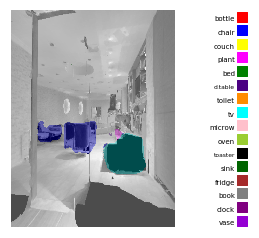

In [377]:
fig = plt.figure(figsize=[ 6., 4.]) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4.27,1]) 
gs.update(left=0.05, right=0.72,wspace=0., hspace=0.)
ax = plt.subplot(gs[1])
ax2 = plt.subplot(gs[0])

ax.margins(0,0)
ax2.margins(0,0)
ax.scatter(data[:, 0], data[:, 1], marker='s', c=colors, edgecolors=colors, s=100, cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    ax.annotate(label, xy=(x, y), xytext=(-7, -5), textcoords='offset points', ha='right', va='bottom', fontsize=min(7,7*6/len(label)))
    
ax.set_xlim([300, 370])
ax.set_aspect('equal')
ax.set_ylim([20, 660])
ax2.imshow(img)
ax.set_axis_off()
ax2.set_axis_off()
ax.get_xaxis().set_visible(False) 
ax.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

rgb image: 


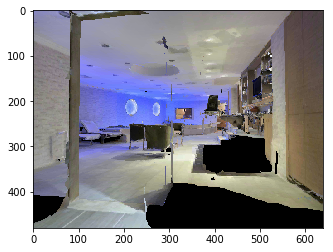

/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # This is added back by InteractiveShellApp.init_path()


semantic image: 


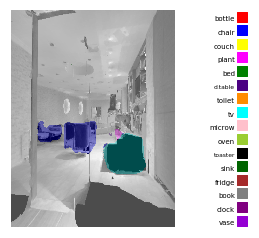

In [378]:
process_image(observations)

rgb image: 


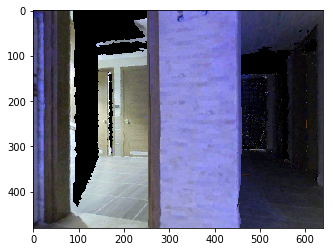

/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # This is added back by InteractiveShellApp.init_path()


semantic image: 


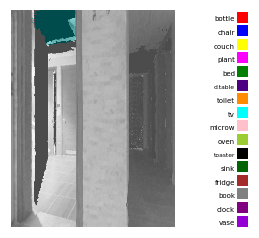

In [380]:
# observations = env.reset()
# MOVE_FORWARD
# TURN_RIGHT
# TURN_LEFT
process_image(observations)

In [381]:
import habitat_sim

In [382]:
scene = env.sim.semantic_annotations()

In [383]:
scene = env.sim.semantic_annotations()
instance_id_to_label_id = {int(obj.id.split("_")[-1]): obj.category.index() for obj in scene.objects}
mapping = np.array([ instance_id_to_label_id[i] for i in range(len(instance_id_to_label_id)) ])

In [384]:
print(mapping[8])

4


In [385]:
obj = scene.objects[0]

In [386]:
print(obj.category.name())
print(obj.category.index())

wall
1


In [387]:
import collections

index_to_title_map = {obj.category.index(): obj.category.name() for obj in scene.objects }


In [388]:
print(index_to_title_map)

{1: 'wall', 40: 'misc', 16: 'stairs', 4: 'door', 2: 'floor', 39: 'objects', 17: 'ceiling', 0: 'void', 14: 'plant', 24: 'column', -1: '', 5: 'table', 21: 'mirror', 15: 'sink', 7: 'cabinet', 28: 'lighting', 34: 'seating', 20: 'towel', 12: 'curtain', 9: 'window', 23: 'shower', 38: 'clothes', 11: 'bed', 35: 'board_panel', 37: 'appliances', 31: 'shelving', 26: 'counter', 22: 'tv_monitor', 3: 'chair'}


In [389]:
keylist = list(index_to_title_map.keys())
keylist.sort()
for key in keylist:
    print(key, index_to_title_map[key])

-1 
0 void
1 wall
2 floor
3 chair
4 door
5 table
7 cabinet
9 window
11 bed
12 curtain
14 plant
15 sink
16 stairs
17 ceiling
20 towel
21 mirror
22 tv_monitor
23 shower
24 column
26 counter
28 lighting
31 shelving
34 seating
35 board_panel
37 appliances
38 clothes
39 objects
40 misc


In [390]:
taskonomy_labels = ['bottle', 'chair', 'couch', 'platnt', 'bed', 'd.table', 'toilet', 'tv', 'microw', 'oven', 'toaster', 'sink', 'fridge', 'book', 'clock', 'vase']

In [391]:
print(taskonomy_labels)

['bottle', 'chair', 'couch', 'plant', 'bed', 'd.table', 'toilet', 'tv', 'microw', 'oven', 'toaster', 'sink', 'fridge', 'book', 'clock', 'vase']


In [392]:
taskonomy_labels = dict(taskonomy_labels)

ValueError: dictionary update sequence element #0 has length 6; 2 is required

In [393]:
mapper = {3: 1, 5: 5, 11: 4, 14: 15, 15: 11, 22: 7}

In [394]:
import csv

rows = []
with open('/home/green-tea/all_projects/habitat/category_mapping.tsv') as tsvfile:
  reader = csv.DictReader(tsvfile, dialect='excel-tab')
  for row in reader:
    rows.append(row)

In [395]:
def prepare_semantic_observation(observations):
    scene = env.sim.semantic_annotations()
    instance_id_to_label_id = {int(obj.id.split("_")[-1]): obj.category.index() for obj in scene.objects}
    mapping = np.array([ instance_id_to_label_id[i] for i in range(len(instance_id_to_label_id)) ])

    return np.take(mapping, observations['semantic'])

In [396]:
import pylab as pl

In [397]:
import matplotlib
mycmap = matplotlib.cm.get_cmap()

In [398]:
import matplotlib.colors as mcolors

colors = list(mcolors.CSS4_COLORS.values())

In [399]:
new_colors = []

for index in np.round(np.linspace(0, 147, 40)).astype(int):
    new_colors.append(colors[index])

In [400]:
def print_segment_image(img, colors, labels):
    
    interval = 40  
    loc = [ interval*16 - interval*x for x in list(range(16)) ]
    loc = [[350, x] for x in loc]
    data = np.asarray(loc)
    
    fig = plt.figure(figsize=[ 6., 4.]) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[4.27,1]) 
    gs.update(left=0.05, right=0.72,wspace=0., hspace=0.)
    ax = plt.subplot(gs[1])
    ax2 = plt.subplot(gs[0])

    ax.margins(0,0)
    ax2.margins(0,0)
    ax.scatter(data[:, 0], data[:, 1], marker='s', c=colors, edgecolors=colors, s=100, cmap=plt.get_cmap('Spectral'))

    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        ax.annotate(label, xy=(x, y), xytext=(-7, -5), textcoords='offset points', ha='right', va='bottom', fontsize=min(7,7*6/len(label)))

    ax.set_xlim([300, 370])
    ax.set_aspect('equal')
    ax.set_ylim([20, 660])
    ax2.imshow(img, cmap=plt.get_cmap('Spectral'))
    ax.set_axis_off()
    ax2.set_axis_off()
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [401]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('test', new_colors, N=len(new_colors))

In [402]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left")

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)
        
    plt.show()

In [403]:
mcolors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

In [404]:
import math

In [409]:
def print_image_data(observations):
    
    goal = mapping[observations['objectgoal'][0]] 
    print(goal, index_to_title_map[goal])
    
    process_image(observations)
    plt.show()
    
    semantic_image = prepare_semantic_observation(observations)
    elements_in_image = []
    
    for string in semantic_image:
        for el in string:
            if not(el in elements_in_image):
                elements_in_image.append(el)
                
    raw_data = elements_in_image
    
    colors = {}
    for entry in raw_data:
        label = index_to_title_map[entry] + ' ' + str(entry)
        denum = max(raw_data) - min(raw_data)
        
        if denum == 0:
            denum = len(new_colors)
        
        value = int(round((entry - 1) * len(new_colors) / denum))
        print(value)
        colors[label] = cmap(value)
        
    plot_colortable(colors, 'colors')
    
    plt.imshow(semantic_image, cmap=cmap)
    plt.show()

1 wall
rgb image: 


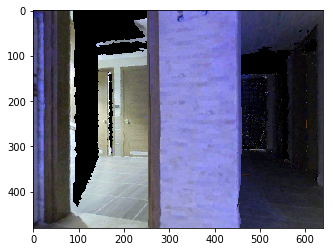

/home/green-tea/miniconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # This is added back by InteractiveShellApp.init_path()


semantic image: 


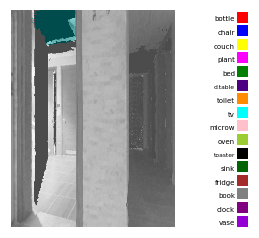

0
3
16
37
40
1


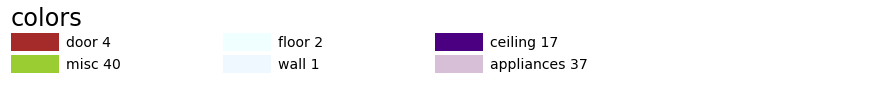

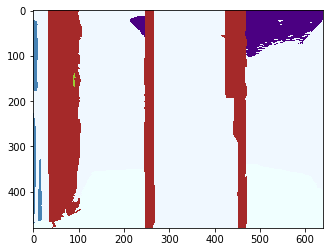

In [410]:
# observations = env.reset()

print_image_data(observations)

In [411]:
COCO_MODEL_PATH = "/home/green-tea/all_projects/mask-R-CNN/v2/Mask_RCNN/mask_rcnn_coco.h5"

In [2]:
import keras
import coco

Using TensorFlow backend.
/home/green-tea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/green-tea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/green-tea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/green-tea/.local/lib/python3.6/site-packages/tenso

AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /home/green-tea/.local/lib/python2.7/site-packages
Requires: tensorflow-estimator, grpcio, mock, keras-applications, enum34, protobuf, keras-preprocessing, gast, tensorboard, wheel, absl-py, backports.weakref, six, numpy, termcolor, astor


In [420]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

AttributeError: module 'coco' has no attribute 'CocoConfig'